In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df=pd.read_csv("/Users/prateekb/Downloads/MyPrograms/Certification/WIP/Machine Learning/Clustering/movie_metadata1.csv")

In [9]:
df[['movie_title','movie_facebook_likes']]

,movie_title,movie_facebook_likes
0,Avatar,33000
1,Pirates of the Caribbean: At World's End,0
2,Spectre,85000
3,The Dark Knight Rises,164000
4,Star Wars: Episode VII - The Force Awakens ...,0
...,...,...
5038,Signed Sealed Delivered,84
5039,The Following,32000
5040,A Plague So Pleasant,16
5041,Shanghai Calling,660


In [10]:
clustering_data=df[['movie_facebook_likes','director_facebook_likes']]
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit(clustering_data)
clustering_data=s.transform(clustering_data)



Text(0, 0.5, 'Inertia')

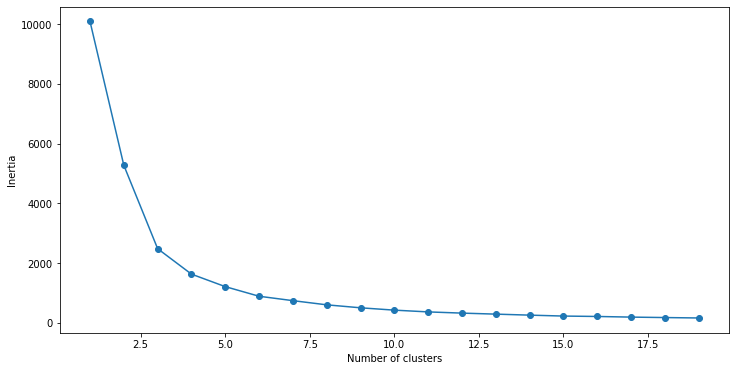

In [11]:
withinClusterDistance = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(clustering_data)
    withinClusterDistance.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
plt.figure(figsize=(12,6))
plt.plot(range(1,20), withinClusterDistance, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [13]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_score(clustering_data,kmeans.labels_)
silhoutte_scores = []
for cluster in range(2,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(clustering_data)
    silhoutte_scores.append(silhouette_score(clustering_data,kmeans.labels_))
silhoutte_scores


[0.8738132495531142,
 0.8442154848265999,
 0.8122070644873779,
 0.8021835215228246,
 0.799450832793308,
 0.7917049419006923,
 0.7963298968855647,
 0.7939222784761125,
 0.7947636964216425,
 0.7948344824286895,
 0.7956614365011537,
 0.7843221624679049,
 0.7751486243842498,
 0.7803485585678194,
 0.7919036029908311,
 0.7797163685608559,
 0.6732173274495402,
 0.6673653424930155]

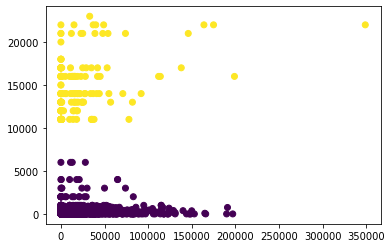

In [14]:
kmeans=KMeans(n_clusters=2,n_init=15,max_iter=300,init='k-means++')
kmeans.fit(clustering_data)
plt.scatter(df['movie_facebook_likes'],df['director_facebook_likes'],c=kmeans.labels_)